In [104]:
# So we can load files from other sub-directories, e.g. datasets.
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path = [module_path] + sys.path
module_path = os.path.abspath(os.path.join('../unlabeled_extrapolation'))
if module_path not in sys.path:
    sys.path = [module_path] + sys.path

import torch
from torch import nn
import torchvision.transforms as transforms
import torchvision.models as models

import json
import numpy as np
from scipy.special import softmax
from sklearn.linear_model import LogisticRegression, SGDClassifier
import quinine
from unlabeled_extrapolation.baseline_train import preprocess_config, get_all_test_stats, get_train_loader, get_test_loaders, build_model
from unlabeled_extrapolation.log_reg_sk import inv_normalize_weights
import unlabeled_extrapolation.utils.utils as utils
import unlabeled_extrapolation.datasets.breeds
import unlabeled_extrapolation.datasets as datasets

import calibration as cal
import unlabeled_extrapolation
import unlabeled_extrapolation.models
import pickle

import clip
import unlabeled_extrapolation.models.clip_model as clip_model

import importlib
importlib.reload(unlabeled_extrapolation.models)
importlib.reload(clip_model)
importlib.reload(datasets.transforms)

<module 'unlabeled_extrapolation.datasets.transforms' from '/juice/scr/ananya/cifar_experiments/unlabeled_extrapolation/unlabeled_extrapolation/datasets/transforms.py'>

In [105]:
model = clip_model.ClipModel('RN50')

In [106]:
model.new_last_layer(40)

In [107]:
model.get_last_layer()

Linear(in_features=1024, out_features=40, bias=True)

In [108]:
import unlabeled_extrapolation.datasets.domainnet as domainnet
import matplotlib.pyplot as plt

In [109]:
# Initialize dataset
config_path = '/u/scr/ananya/cifar_experiments/unlabeled_extrapolation/configs/adaptation/domainnet.yaml'
config = quinine.Quinfig(config_path)
preprocess_config(config, config_path)
if not config.train_dataset.classname.startswith('unlabeled_extrapolation.'):
    config.train_dataset.classname = 'unlabeled_extrapolation.' + config.train_dataset.classname
train_loader = get_train_loader(config)

In [110]:
data = next(iter(train_loader))

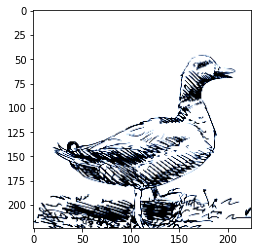

In [111]:
plt.imshow(data[0][0].permute(1, 2, 0).numpy())

In [114]:
model(data[0].cuda()).shape

torch.Size([64, 40])

In [113]:
import torchvision.transforms

In [ ]:
torchvision.transforms.Resize(224, interpolation='bilinear', max_size=224)